---------------------------


# Performance Assessment: D208 Predictive Modeling Task 1 - Multiple Linear Regression.

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D208: Predictive Modeling
<br>Professor Dr. Straw
<br>February 11, 2024


# Part I: Research Question
## Describe the purpose of this data analysis by doing the following::

### **A1. Research Question:**
**"A1. Research Question:
"What factors contribute to the length of a patient's hospital stay?"**

This question aims to identify key variables within the dataset that influence `Initial_days`; The number of days the patient stayed in the hospital during the initial visit to the hospital. 

### **A2. Define the goals of the data analysis.**

The project sets out to explore the relationship between response and predictor variables by developing a multiple regression model based on medical data. The research question focuses on identifying any factors that affect the length of a patient's hospital stay, exploring variables such as demographic details, medical history, financial factors, and services received. Using Python for analysis, supported by visual aids for clarity, the aim is to address real-world healthcare challenges through a muktiple linear regression model. Data cleaning is emphasized to ensure accuracy and reliability.The Python code for analysis, data cleaning, and preparation will be shared. The culmination of this project involves creating and evaluating a multiple linear regression model, discussing its significance both statistically and practically, highlighting limitations, and suggesting actionable steps for healthcare organizations to enhance planning, patient care, and operational efficiency.

-------------------------------------

# Part II: Method Justification

## B. Describe multiple linear regression methods by doing the following:

### **B1. Summarize four assumptions of a multiple linear regression model:**

In multiple linear regression analysis, four key assumptions are critical: linearity between variables, independence of observations, constant error variance (homoscedasticity), and normal distribution of error terms. Understanding and checking these assumptions is essential for the model's reliability and accuracy, providing a solid basis for predictive analytics.

-   **Linearity** asserts that there is a straight-line relationship between each predictor (independent variable) and the response (dependent variable). This means that changes in a predictor variable are associated with proportional changes in the response variable.

-   **Independence of Observations** indicates that the data points in the dataset do not influence each other. Each observation's response is determined by its predictor values, free from the effects of other observations in the dataset.

-   **Homoscedasticity** refers to the requirement that the error terms (differences between observed and predicted values) maintain a consistent variance across all levels of the independent variables. This constant variance ensures that the model's accuracy does not depend on the value of the predictors.

-    **Normality of Errors** involves the assumption that for any fixed value of an independent variable, the error terms are normally distributed. This normal distribution is central to conducting various statistical tests on the model's coefficients to determine their significance.

(Statology, n.d.)
(Pennsylvania State University, n.d.)

### **B2. Describe two benefits of using Python for data analysis:**

- **Rich Libraries:** While R was specifically designed with statistics and data analysis in mind, Python distinguishes itself with its comprehensive suite of libraries that cater to virtually every phase of the data analysis process. Libraries such as Pandas for data manipulation allow for efficient handling and transformation of data, NumPy for numerical computations supports complex mathematical operations with ease, and Matplotlib along with Seaborn for visualization enable the creation of insightful and high-quality graphs and charts. Moreover, Scikit-learn offers a robust platform for applying machine learning algorithms, streamlining the development of predictive models. These libraries not only facilitate a wide range of data analysis tasks but also ensure that analysts have the tools needed to tackle complex data challenges effectively.

- **Versatility** Python's syntax is known for its intuitive and readable nature, making it an accessible choice for professionals across various domains, from data science to web development. This versatility extends Python's utility beyond data analysis to other applications such as web development, automation, and deep learning, through frameworks and libraries like Flask, Selenium, and TensorFlow respectively. For instance, an analyst can easily switch from analyzing data to deploying a machine-learning model as a web application within the same programming environment. This seamless integration across different tasks enables a smooth workflow and promotes a holistic approach to problem-solving in today's interconnected digital landscape.

### **B3. Explain why multiple linear regression is an appropriate technique for analyzing the research question summarized in part I:**

Multiple linear regression is particularly suited for addressing the research question at hand, as it facilitates the exploration of how several independent variables collectively influence a single continuous dependent variable, in this case, `Initial_days`. This analytical technique is adept at not only identifying but also quantifying the strength and nature of the relationships between Initial_days and various predictors, such as financial aspects, services rendered, and patient risk factors. By accounting for multiple factors simultaneously, multiple linear regression can provide nuanced insights into their combined effects on the length of a hospital stay. This comprehensive understanding is crucial for building robust predictive models that can inform decision-making processes.

# NEEDS EDIT
 Part III: Data Preparation

## C. Summarize the data preparation process for multiple linear regression analysis by doing the following:

### *C1. Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.**

*   **Importing the Data**: Use`pd.read_csv()` to import data into a Pandas DataFrame.
    
*   **Initial Data Examination**: Using `df.head()` provides a quick snapshot of the dataset, including a view of the first few rows. This helps in getting a preliminary understanding of the data's structure and content.
    
*   **Checking Data Types**: The `df.info()` method is used for assessing the dataset's overall structure, including the data types of each column and the presence of non-null values. 
    
*   **Identifying Duplicate Rows**: Utilizing `df.duplicated()` to find duplicate rows is an essential cleaning step. Duplicates can skew your analysis and lead to inaccurate models. Once identified, you can decide whether to remove these rows with `df.drop_duplicates()` depending on their relevance to your research question.
    
*   **Detecting Missing Values**: The `df.isnull().sum()` command is instrumental in identifying missing values across the dataset. Understanding where and how much data is missing is critical for deciding on imputation methods or if certain rows/columns should be excluded from the analysis.

*   **Outlier Management Strategy:**: In this dataset, outliers are important to detect and be aware of. Particularly when creating predictive regression models. For example outliers can have a detrimental effect on our regression assumption and the model itself(MIDDLETON VIDEO) If there are outliers present, make sure that they are real is important. However, in the context of medical data, outliers can have an extra level of nuance. This is because in medical data, outliers are often the very things that we are interested in. For example, a patient with a very high cholesterol level or a very low blood pressure. These values are not errors, but rather important indicators of health conditions.

- Therefore, in this analysis, we will look for outliers and pay close attention to the details of the variables themselves. Outliers will be noted, but not necessarily treated unless they are obvious data entry errors or if they hinder our model.

*    **Reviewing Unique Values**: Although `df.unique()` is used to explore unique values in a Series, for dataframes, you might consider `df.nunique()` to see the number of unique values in each column or use `df['column_name'].unique()` to check unique values in specific columns. This step is valuable for understanding the diversity of information within your dataset, particularly for categorical data.

*   **Drop Unnecessary Columns**: Any columns that are not relevant to the research question or the predictive model will be dropped from the dataset. 

*   **Categorical variable conversion**: Categorical variables will be transformed into numerical formats. Demographic data, which represents static information about patients and cannot be altered by the hospital, will be excluded from the analysis. We will identify and address any missing data, ensuring its proper mitigation. Additionally, any duplicate records identified in the dataset will be eliminated."


In [1]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


- Display variable description and data types with examples.

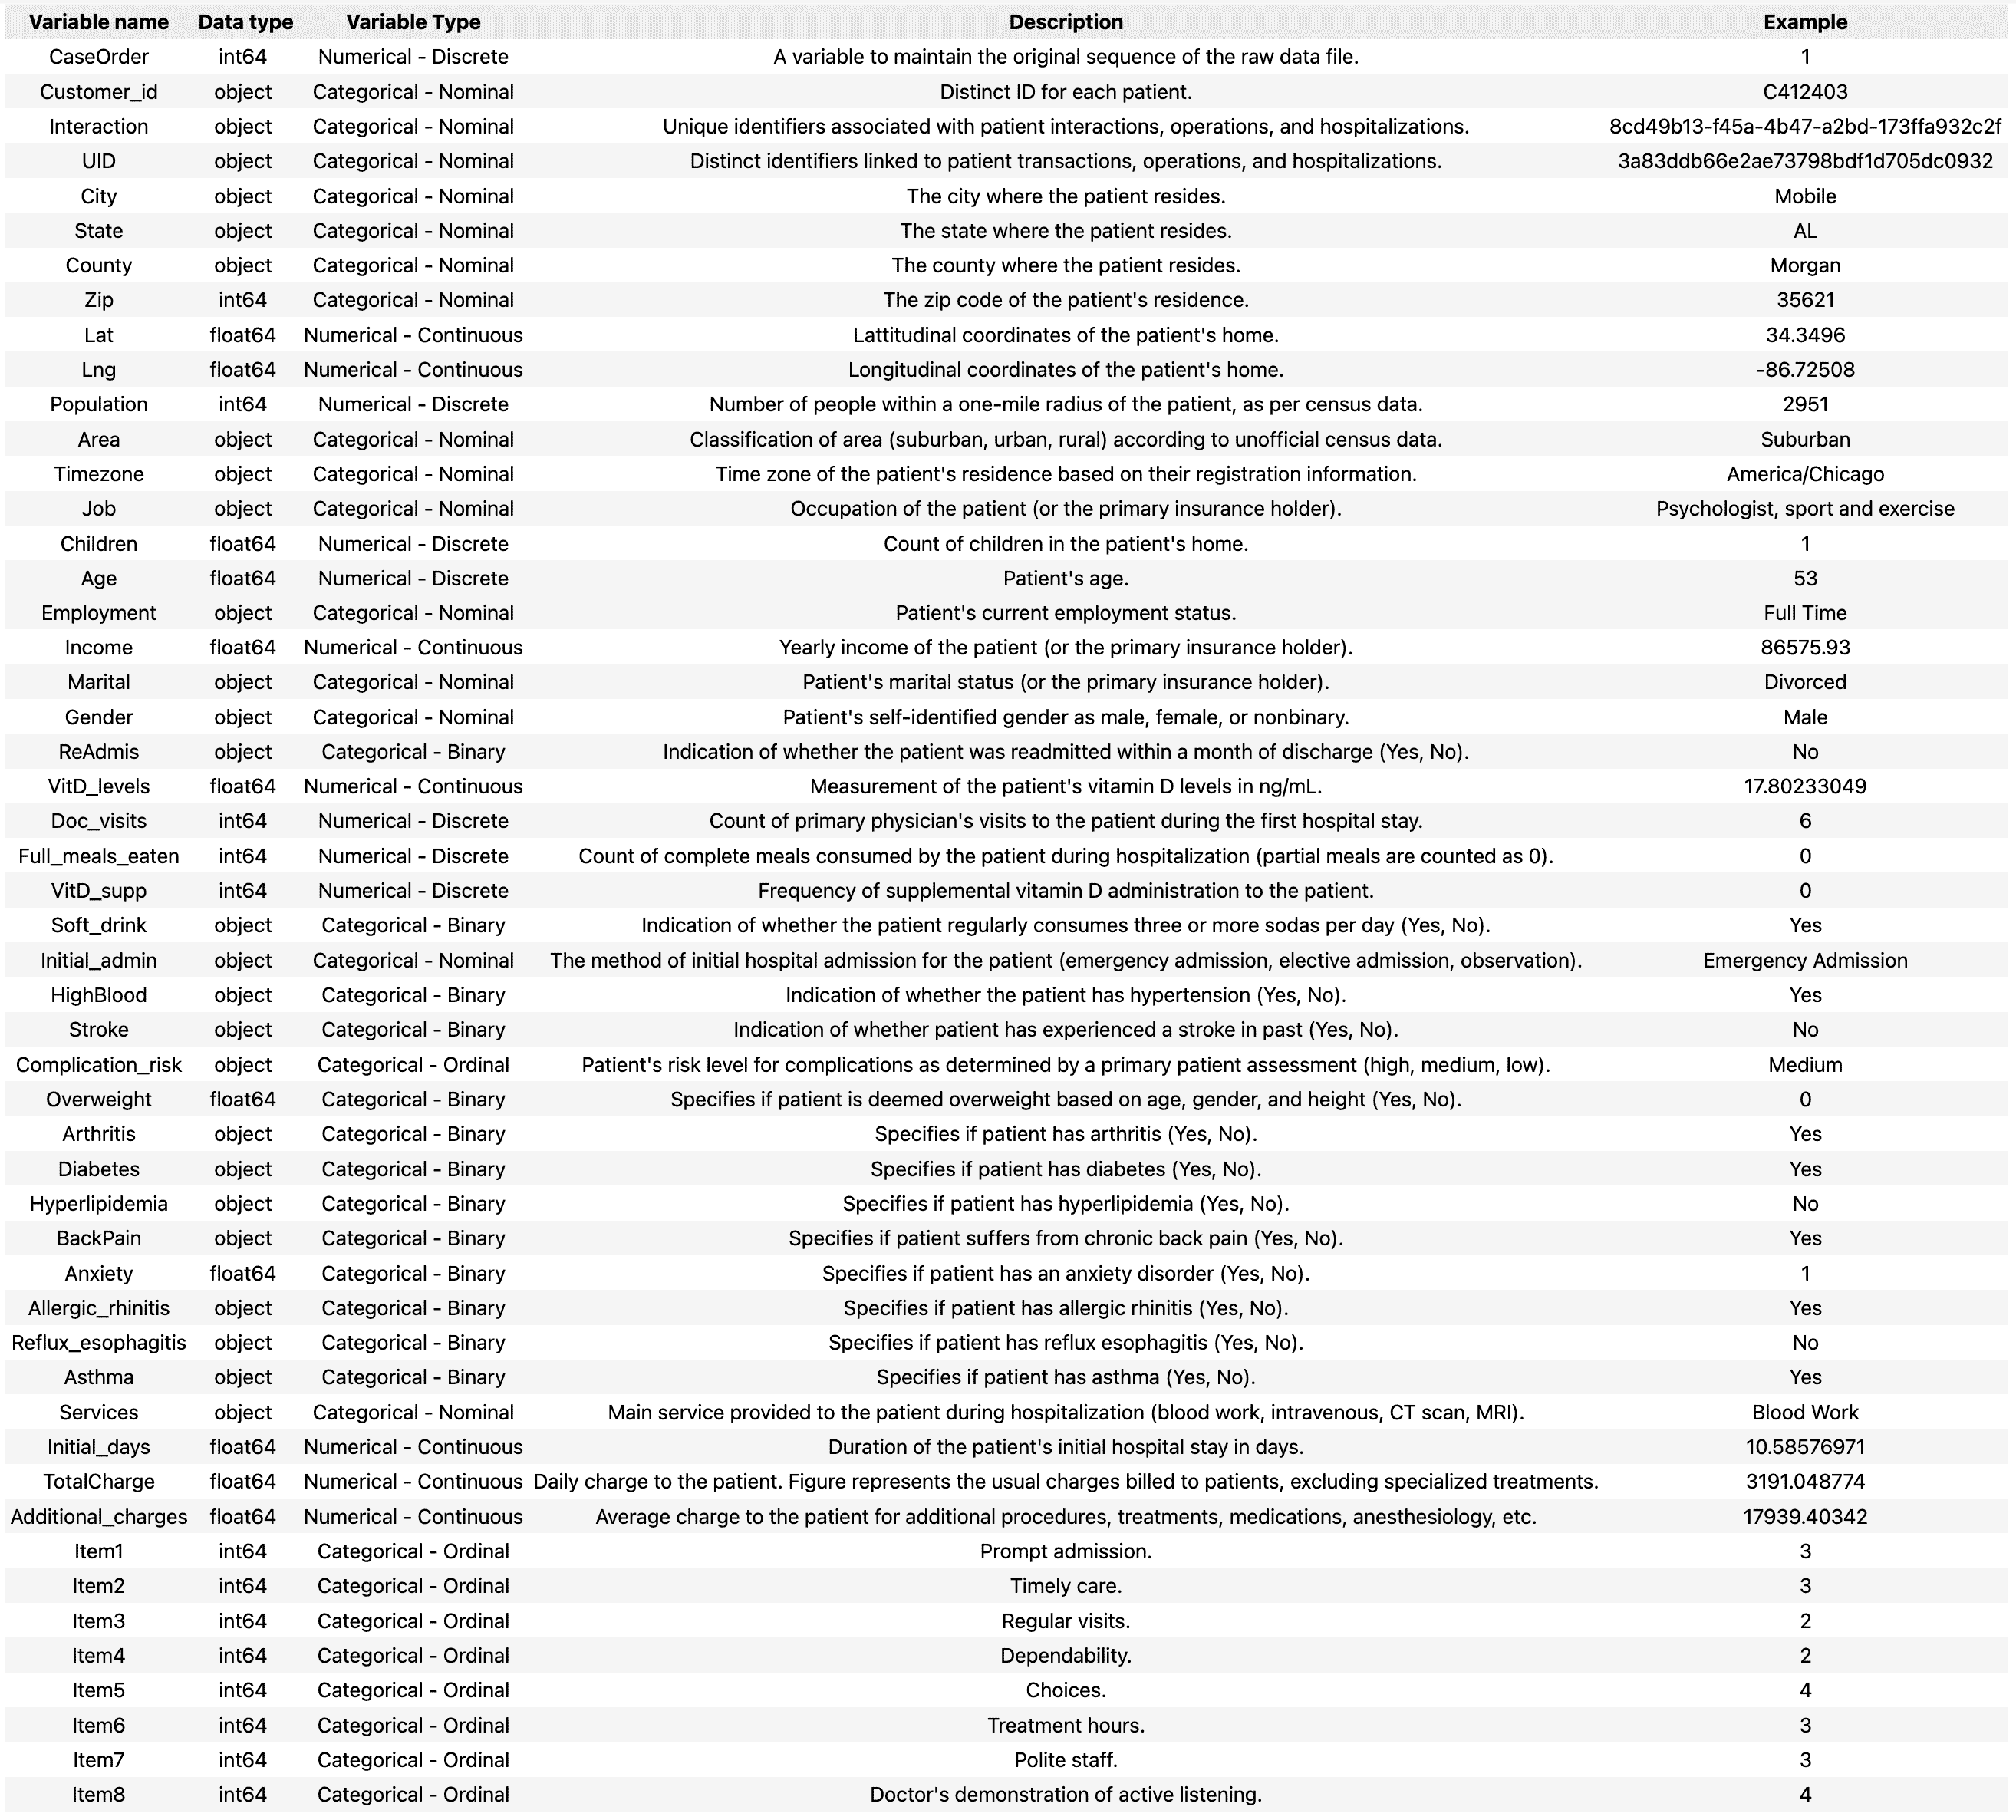

In [2]:
# original data variable description and data types with examples.

from IPython.display import Image
Image(filename='variable_description_208.png')

In [3]:
# import the data and read it into a dataframe, setting the first column CaseOrder as the index

df_medical = pd.read_csv('D208_templates/medical_clean.csv', index_col=0)

# Display the first five rows of the data
df_medical.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# View the last 5 rows of the dataframe
df_medical.tail()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,...,6850.942,8927.642,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,...,7741.690,28507.150,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,...,8276.481,15281.210,3,3,3,4,4,2,3,2
9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,...,7644.483,7781.678,5,5,3,4,4,3,4,3
10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,...,7887.553,11643.190,4,3,3,2,3,6,4,3


In [5]:
# Check the DataFrame information
df_medical.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [6]:
# Check for duplicate rows. 
print(df_medical.duplicated().value_counts())

# Display the count of duplicate rows
print('Total Duplicated Rows: ', df_medical.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicated Rows:  0


In [7]:
# Check for null values
df_medical.isnull().sum()



Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1           

# C2.  EDA 

In [8]:
# rename columns Item 1 to Item 8 to the appropriate column names. The 'S_' modifier is used to indicate the column is a survey item.
new_col_names={
    'Item1':'S_T_Admission',
    'Item2':'S_T_Treatment', 
    'Item3':'S_T_Visits', 
    'Item4':'S_Reliability', 'Item5':'S_Options', 
    'Item6':'S_Hours_Treatment', 
    'Item7':'S_Staff', 
    'Item8':'S_Active_Listening'}
df_medical.rename(columns=new_col_names, inplace=True)
df_medical.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability',
       'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening'],
      dtype='object')

In [9]:
# combine the data types and unique values count into a DataFrame easy reference and comparison
data_types = df_medical.dtypes

unique_values = df_medical.nunique()

comparison_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})

comparison_df.sort_values(by='Unique Values', ascending=False)

,Data Type,Unique Values
Customer_id,object,10000
UID,object,10000
Interaction,object,10000
Initial_days,float64,9997
TotalCharge,float64,9997
Income,float64,9993
VitD_levels,float64,9976
Additional_charges,float64,9418
Lng,float64,8725
Zip,int64,8612


# Cardinality and Data Type Summary of Variables

## Ratio Variables (Continuous with an absolute zero)
- `Income`: 9993 unique values (float64)
- `VitD_levels`: 9976 unique values (float64)
- `Initial_days`: 9997 unique values (float64)
- `TotalCharge`: 9997 unique values (float64)
- `Additional_charges`: 9418 unique values (float64)
- `Population`: 5951 unique values (int64)
- `Children`: 11 unique values (int64)
- `Age`: 72 unique values (int64)
- `Doc_visits`: 9 unique values (int64)
- `Full_meals_eaten`: 8 unique values (int64)
- `vitD_supp`: 6 unique values (int64)

## Interval Variables (Continuous without an absolute zero)
- `Lat`: 8588 unique values (float64)
- `Lng`: 8725 unique values (float64)

## Ordinal Variables
- `S_T_Admission`: 8 unique values (int64)
- `S_T_Treatment`: 7 unique values (int64)
- `S_T_Visits`: 8 unique values (int64)
- `S_Reliability`: 7 unique values (int64)
- `S_Options`: 7 unique values (int64)
- `S_Hours_Treatment`: 7 unique values (int64)
- `S_Staff`: 7 unique values (int64)
- `S_Active_Listening`: 7 unique values (int64)

## Nominal Variables (Categorical)
- `Customer_id`: 10000 unique values (object)
- `Interaction`: 10000 unique values (object)
- `UID`: 10000 unique values (object)
- `City`: 6072 unique values (object)
- `State`: 52 unique values (object)
- `County`: 1607 unique values (object)
- `Zip`: 8612 unique values (int64)
- `Area`: 3 unique values (object)
- `TimeZone`: 26 unique values (object)
- `Job`: 639 unique values (object)
- `Marital`: 5 unique values (object)
- `Gender`: 3 unique values (object)
- `ReAdmis`: 2 unique values (object)
- `Soft_drink`: 2 unique values (object)
- `Initial_admin`: 3 unique values (object)
- `HighBlood`: 2 unique values (object)
- `Stroke`: 2 unique values (object)
- `Complication_risk`: 3 unique values (object)
- `Overweight`: 2 unique values (object)
- `Arthritis`: 2 unique values (object)
- `Diabetes`: 2 unique values (object)
- `Hyperlipidemia`: 2 unique values (object)
- `BackPain`: 2 unique values (object)
- `Anxiety`: 2 unique values (object)
- `Allergic_rhinitis`: 2 unique values (object)
- `Reflux_esophagitis`: 2 unique values (object)
- `Asthma`: 2 unique values (object)
- `Services`: 4 unique values (object)

**Given the nature of the data, there are several variables that will be excluded from the analysis. Here is a brief summary of the variables that will be excluded and the rationale for their exclusion:**

### Current Strategy Overview:
1. **Broad Inclusion**: Start with a wide array of variables to capture potential influences on `Initial_days`, informed by my domain knowledge.
2. **Build Initial Model**: Use this extensive dataset to identify significant predictors.
3. **Analyze & Refine**: Eliminate non-contributing or highly correlated variables based on initial model insights.
4. **Develop Reduced Model**: Focus on key variables for a streamlined, effective model.

### Variables Eliminated:
*Note: I am a former health care professional who has worked in several hospitals and have had extensive hospital stays as a patient and this domain knowledge informs my decision making here.*
- **TotalCharge & Additional Charges**: Possible high correlation and generally a result of `Initial_days` not a cause of. Patients and staff often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depends on patient and services that without context ths variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for targeted occupational study.
- **Services**: All very common in diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion. 
- **Soft_drink**: Poorly defined as soft drink can mean anything from uncaffinated carbonated water to a caffinated sugary soda.


In [10]:
# create reduced dataframe with only the columns  for the analysis
# columns to drop
colms_to_drop = ['TotalCharge', 'Services', 'Soft_drink', 'Additional_charges', 'Lat', 'Full_meals_eaten', 'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Job', 'Population']

# Creates list of columns except the 'Initial_days'
remaining_cols = [col for col in df_medical.columns if col not in colms_to_drop + ['Initial_days']]

# Addd 'Initial_days' to the end of column list - for backwards elimination intuition
final_cols = remaining_cols + ['Initial_days']

# crerate final df with the proper column order
df_reduced = df_medical[final_cols].copy()

# display the dataframe in full
pd.set_option('display.max_columns', None)
df_reduced

,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Suburban,1,53,86575.93,Divorced,Male,No,19.141466,6,0,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,3,3,2,2,4,3,3,4,10.585770
2,Urban,3,51,46805.99,Married,Female,No,18.940352,4,1,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,3,4,3,4,4,4,3,3,15.129562
3,Suburban,3,53,14370.14,Widowed,Female,No,18.057507,4,0,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,2,4,4,4,3,4,3,3,4.772177
4,Suburban,0,78,39741.49,Married,Male,No,16.576858,4,0,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,3,5,5,3,4,5,5,5,1.714879
5,Rural,1,22,1209.56,Widowed,Female,No,17.439069,5,2,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,2,1,3,3,5,3,4,3,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Urban,2,25,45967.61,Widowed,Male,No,16.980860,4,1,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,3,2,2,3,4,3,4,2,51.561220
9997,Urban,4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,3,3,4,2,5,3,4,4,68.668240
9998,Rural,3,45,65917.81,Separated,Female,Yes,17.129070,4,0,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,3,3,3,4,4,2,3,2,70.154180


In [11]:
# Summary Stats For numeric variables (numerical summary)
selected_columns = df_reduced[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days']].copy()
selected_columns.describe()


,Age,Income,VitD_levels,Doc_visits,vitD_supp,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,17.964262,5.012200,0.398900,34.455299
std,20.638538,28521.153293,2.017231,1.045734,0.628505,26.309341
min,18.000000,154.080000,9.806483,1.000000,0.000000,1.001981
25%,36.000000,19598.775000,16.626439,4.000000,0.000000,7.896215
50%,53.000000,33768.420000,17.951122,5.000000,0.000000,35.836244
75%,71.000000,54296.402500,19.347963,6.000000,1.000000,61.161020
max,89.000000,207249.100000,26.394449,9.000000,5.000000,71.981490


### Initial Takeaways:

- **Age**: Averages 53 years, ranging from 18 to 89, with a diverse age profile.
- **Income**: Averages $40,490, with wide variation (154 to 207249), indicating economic diversity.
- **VitD_levels**: Averages 17.96, mostly within a narrow range (9.81 to 26.39), suggesting more consistent levels across patients.
- **Doc_visits**: Averages 5 visits, indicating a similar frequency of medical consultations.
- **vitD_supp**: Averages less than 0.5 supplements, with low intake common among patients.

- **Categorical** nominal and ordinal variables are not included here and will include a separate summary of proportions along wit univariate and bivariate visualizations.
- **Initial_days**: Our dependent (target) variable will be fully summarize and visualized below


# Rounding Justification. 
-    Rounding 'Initial_days' from 8 decimal places to 2significantly reduces the number of unique values, which can simplify analyses and visualizations by reducing the granularity of the data. Precision beyond 2 decimal places does not add meaningful information for the analysis. In many practical scenarios, especially related to days, a precision of 2 decimal places is sufficient to capture relevant variations without unnecessarily complicating the dataset.  In healthcare data, for instance, it's unlikely that fractions of a day to eight decimal places would impact decisions or care outcomes.

- Similarly, rounding 'Income' to whole numbers, and 'VitD_levels' to 2 decimal places seems appropriate in this context.

In [12]:
# Round 'Initial_days' and 'VitD_levels' to 2 decimal places
df_reduced = df_reduced.round({'VitD_levels': 2})
df_reduced = df_reduced.round({'Initial_days': 2})

# Round 'Income' to 0 decimal places by converting to integer
df_reduced = df_reduced.astype({'Income': 'int64'})

# Display the dataframe with the rounded values
df_reduced[['Initial_days', 'VitD_levels', 'Income']].head()


,Initial_days,VitD_levels,Income
CaseOrder,,,
1,10.59,19.14,86575
2,15.13,18.94,46805
3,4.77,18.06,14370
4,1.71,16.58,39741
5,1.25,17.44,1209


In [13]:
# Export to csv and then read back to to save results so far and to reduce memory consumption.
df_reduced.to_csv('df_reduced.csv', index='CaseOrder')


In [14]:

df = pd.read_csv('df_reduced.csv', index_col=0)
df

,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Initial_days
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Suburban,1,53,86575,Divorced,Male,No,19.14,6,0,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,3,3,2,2,4,3,3,4,10.59
2,Urban,3,51,46805,Married,Female,No,18.94,4,1,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,3,4,3,4,4,4,3,3,15.13
3,Suburban,3,53,14370,Widowed,Female,No,18.06,4,0,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,2,4,4,4,3,4,3,3,4.77
4,Suburban,0,78,39741,Married,Male,No,16.58,4,0,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,3,5,5,3,4,5,5,5,1.71
5,Rural,1,22,1209,Widowed,Female,No,17.44,5,2,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,2,1,3,3,5,3,4,3,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Urban,2,25,45967,Widowed,Male,No,16.98,4,1,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,3,2,2,3,4,3,4,2,51.56
9997,Urban,4,87,14983,Widowed,Male,Yes,18.18,5,0,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,3,3,4,2,5,3,4,4,68.67
9998,Rural,3,45,65917,Separated,Female,Yes,17.13,4,0,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,3,3,3,4,4,2,3,2,70.15


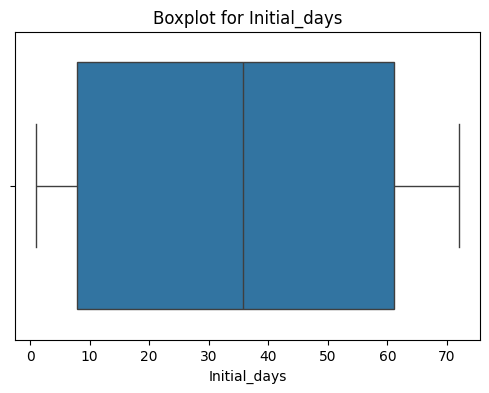

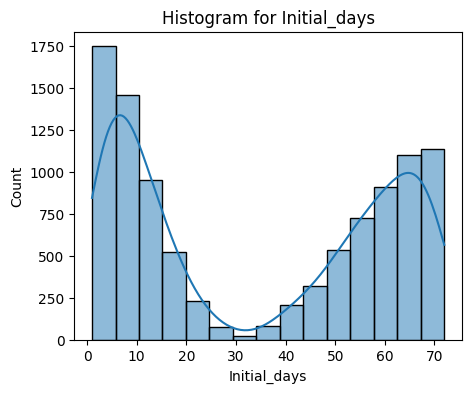

count    10000.000000
mean        34.455284
std         26.309382
min          1.000000
25%          7.900000
50%         35.840000
75%         61.162500
max         71.980000
Name: Initial_days, dtype: float64

In [15]:
# Boxplot for 'Initial_days'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='Initial_days', kde=True)
plt.title('Histogram for Initial_days')
plt.show()

df['Initial_days'].describe()

- **Boxplot Observations**: The median appears to be above the mid-30s, suggesting that roughly half of the patients have shorter initial stays and the other half have longer. There are no visible outliers, indicating no extreme values or anomalies that fall outside the typical range. The interfertile range shows that the middle 50% of the data spans a rather large range, suggesting a concentration of data within this segment.

- **Histogram Observations**: The distribution is bimodal, with two peaks: one just under a few days and another around 70 days. This suggests there are two groups of patients with different typical hospital stay lengths. The histogram indicates that shorter initial stays are more common than longer stays, with a significant drop-off in frequency as the number of days increases towards the middle values. The spread between the two modes shows that there is variability in the data, not concentrated around a single central value. The bimodal distribution could imply two prevalent groups or clusters within the dataset for `Initial_days`. Understanding the reasons behind this bimodal distribution may require further investigation into the underlying factors affecting hospital stay lengths. This distribution is important to kee in mind when interpreting the results of the regression analysis, as it may influence the model's predictive accuracy and the significance of the predictors. Bimodal distributions can be challenging for regression models to capture accurately, as they may require more complex modeling techniques to account for the distinct groups within the data.


**Summary**: Statistical measures for `Initial_days` across all patients in the dataset, including:

- **Count**: 10,000 observations. This represents the number of patients included in the analysis.
- **Mean**: Approximately 34 days. On average, patients spend a little over a month in the hospital.
- **Standard Deviation**: About 26 days. This indicates a wide variation in the length of hospital stays among patients; while some patients have short stays, others have significantly longer stays.
- **Minimum**: Just over 1 day. This shows that some patients are discharged almost immediately after admission.
- **25% (First Quartile)**: About 8 days or less. A quarter of the patients have hospital stays just over a week.
- **Median (50%)**: Approximately 36 days. This is very close to the mean. However, the slight difference between the mean and median indicates a slight skew in the data.
- **75% (Third Quartile)**: About 61 days or less. Most patients are discharged within two months.
- **Maximum**: Nearly 72 days. Indicates that some patients have extended hospital stays.

-------------------------------------


# C3.  Visualizations 

Univariate and Bivariate Visualizations for independent variables and their relationship with the dependent variable `Initial_days`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. The web article by RealPython education site and Seaborn own documentation will be used as a guide for the visualizations. (sourcew) https://realpython.com/python-seaborn/ and (source) https://seaborn.pydata.org/introduction.html. 

# Univaraite Visualizations

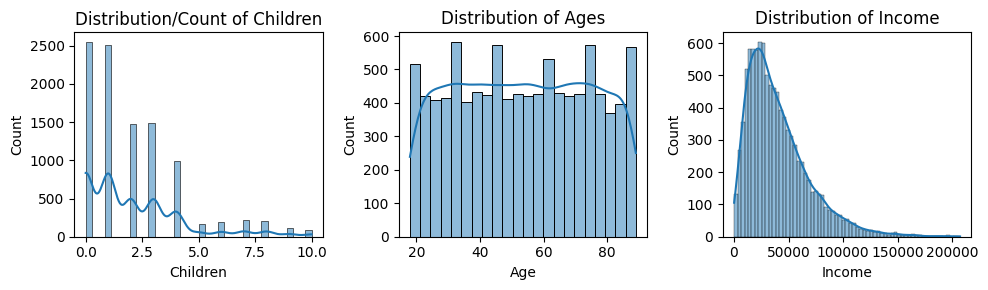

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.0972,2.163659,0.0,0.00,1.0,3.00,10.0
Age,10000.0,53.5117,20.638538,18.0,36.00,53.0,71.00,89.0
Income,10000.0,40490.0021,28521.152883,154.0,19598.25,33768.0,54295.75,207249.0


In [16]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of children
sns.histplot(data=df, x='Children', ax=axes[0], kde=True)
axes[0].set_title('Distribution/Count of Children')

# distribution of ages
sns.histplot(data=df, x='Age', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Ages')

# distribution of income
sns.histplot(data=df, x='Income', ax=axes[2], kde=True)
axes[2].set_title('Distribution of Income')

plt.tight_layout()
plt.show()

# summary statistics for the variables
df[['Children', 'Age', 'Income']].describe().transpose()

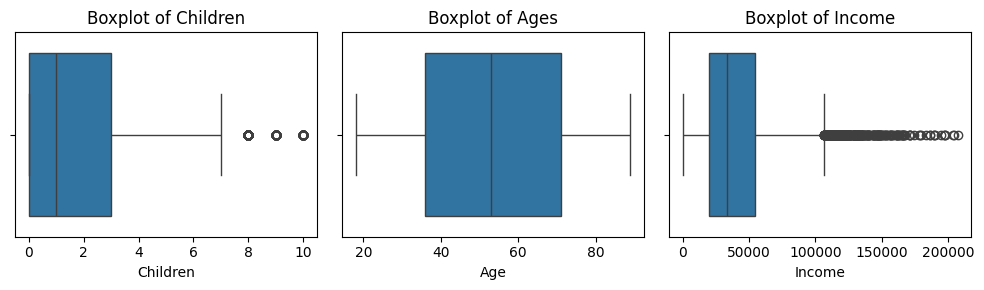

In [17]:
# subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# boxplot of children
sns.boxplot(data=df, x='Children', ax=axes[0])
axes[0].set_title('Boxplot of Children')

# boxplot of ages
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Ages')

# boxplot of income
sns.boxplot(data=df, x='Income', ax=axes[2])
axes[2].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()




- The outliers here will be noted as they may impact the regression model, particularly with OLS regression. For now, we will note them and include as is in the initial model.

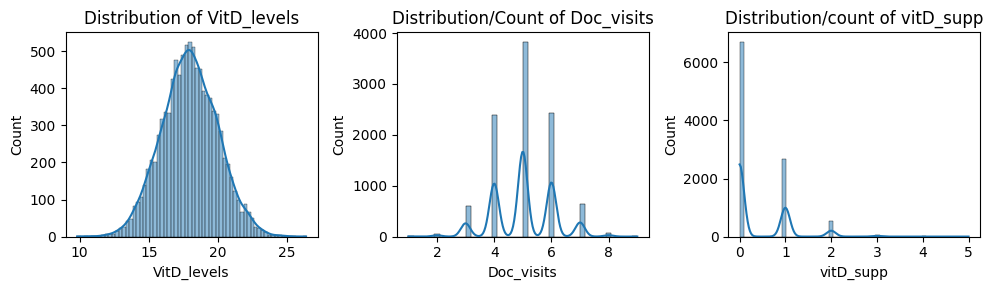

,count,mean,std,min,25%,50%,75%,max
VitD_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
Doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
vitD_supp,10000.0,0.398900,0.628505,0.00,0.0000,0.00,1.00,5.00


In [18]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of VitD_levels
sns.histplot(data=df, x='VitD_levels', ax=axes[0], kde=True)
axes[0].set_title('Distribution of VitD_levels')

# distribution/count of Doc_visits with bigger bins
sns.histplot(data=df, x='Doc_visits', ax=axes[1], kde=True)
axes[1].set_title('Distribution/Count of Doc_visits')

# distribution/count of vitD_supp with bigger bins
sns.histplot(data=df, x='vitD_supp', ax=axes[2], kde=True)
axes[2].set_title('Distribution/count of vitD_supp')

plt.tight_layout()
plt.show()
# descriptive statistics for the variables
df[['VitD_levels', 'Doc_visits', 'vitD_supp']].describe().transpose()

- The `Vitamin D levels` appear normally distributed around a middle value, suggesting that most patients have Vitamin D levels within a standard range, with fewer individuals having very high or very low levels. `Doc_visits` show a pattern with most patientss having 4-6 visits, and the frequency drops for higher numbers of visits. For Vitamin `D supplements`, most patients are not given supplements, which aligns with the distribution of Vitamin D levels.

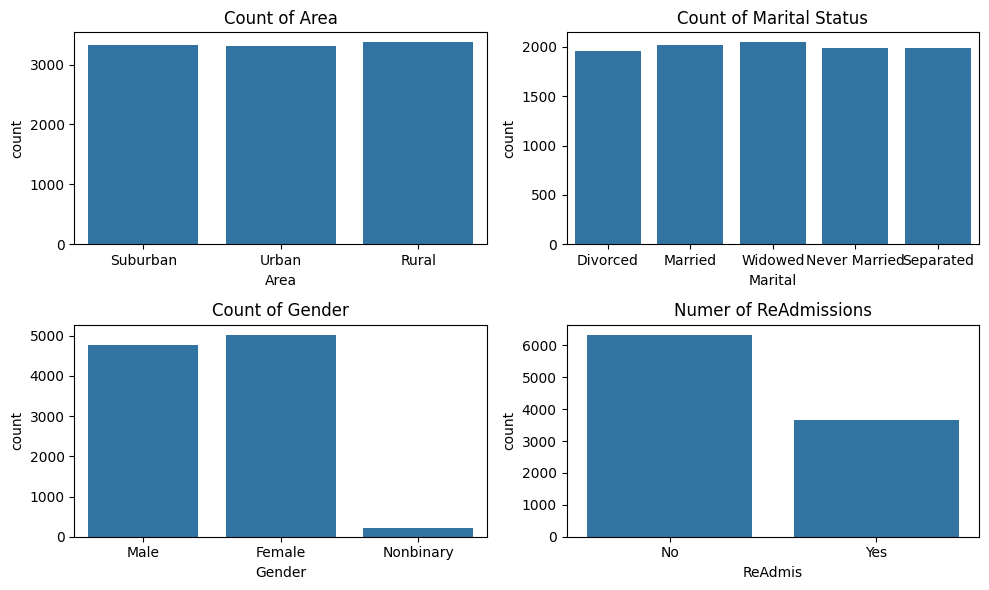

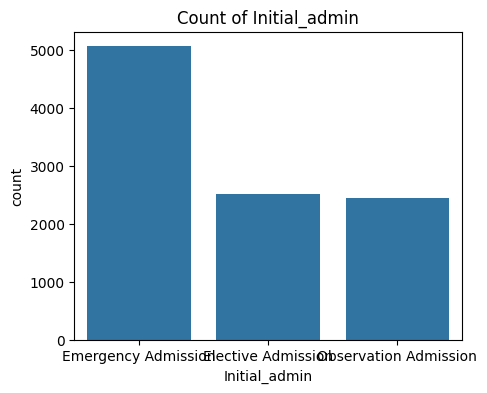

In [19]:
# Create a 2 by 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Area
sns.countplot(data=df, x='Area', ax=axes[0, 0])
axes[0, 0].set_title('Count of Area')

# Marital
sns.countplot(data=df, x='Marital', ax=axes[0, 1])
axes[0, 1].set_title('Count of Marital Status')

# Gender
sns.countplot(data=df, x='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Count of Gender')

# ReAdmis
sns.countplot(data=df, x='ReAdmis', ax=axes[1, 1])
axes[1, 1].set_title('Numer of ReAdmissions')

plt.tight_layout()
plt.show()

# create a countplot for initial_admin
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Initial_admin')
plt.title('Count of Initial_admin')


plt.show()

# Proportion Summary 

`Area`
- Rural: 33.69%
- Urban: 33.03%
- Suburban: 33.28%

`Gender`
- Female: 50.18%
- Male: 47.68%
- Nonbinary: 2.14%

`Marital`
- Widowed: 20.45% 
- Married: 20.23% 
- Separated: 19.87% 
- Never Married: 19.84% 
- Divorced: 19.61%

`ReAdmis`
- No: 63.31%
- Yes: 36.69%

`Initial_admin`
- Emergency: 51.60%
- Elective: 25.04%
- Observation: 24.36%


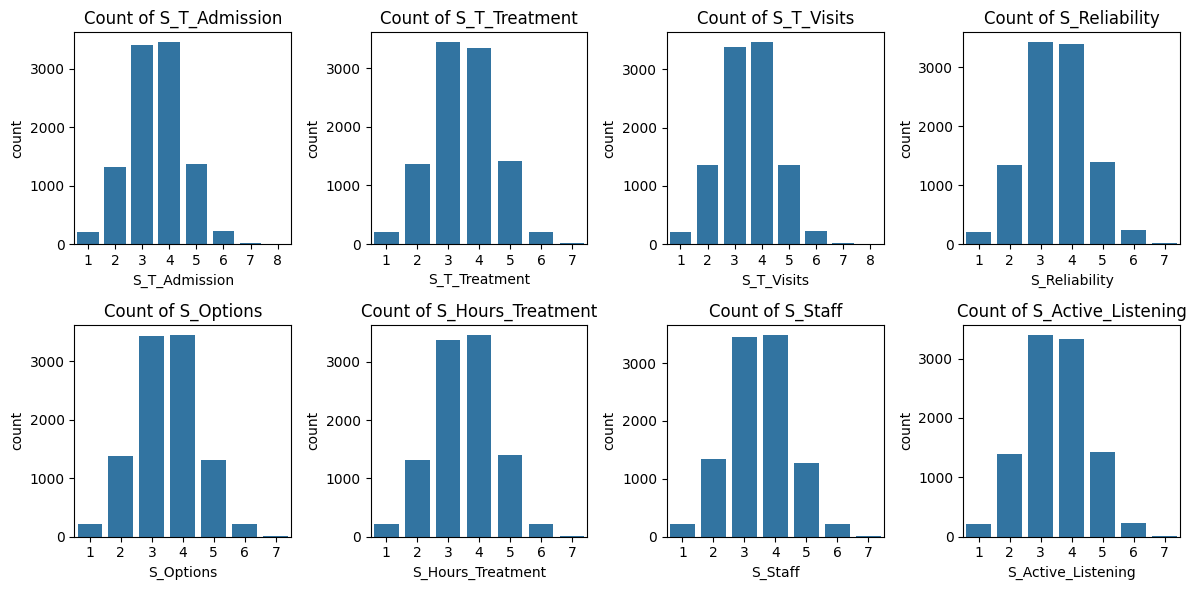

,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening
1,213,213.0,211,207.0,211.0,213.0,215.0,209.0
2,1315,1360.0,1356,1346.0,1380.0,1319.0,1345.0,1391.0
3,3404,3439.0,3379,3422.0,3423.0,3371.0,3456.0,3401.0
4,3455,3351.0,3464,3394.0,3446.0,3464.0,3487.0,3337.0
5,1377,1421.0,1358,1388.0,1308.0,1403.0,1274.0,1429.0
6,225,204.0,220,231.0,219.0,220.0,212.0,221.0
7,10,12.0,11,12.0,13.0,10.0,11.0,12.0
8,1,NaN,1,NaN,NaN,NaN,NaN,NaN


In [20]:

# 2 by 4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# S_T_Admission
sns.countplot(data=df, x='S_T_Admission', ax=axes[0, 0])
axes[0, 0].set_title('Count of S_T_Admission')

# S_T_Treatment
sns.countplot(data=df, x='S_T_Treatment', ax=axes[0, 1])
axes[0, 1].set_title('Count of S_T_Treatment')

# S_T_Visits
sns.countplot(data=df, x='S_T_Visits', ax=axes[0, 2])
axes[0, 2].set_title('Count of S_T_Visits')

# S_Reliability
sns.countplot(data=df, x='S_Reliability', ax=axes[0, 3])
axes[0, 3].set_title('Count of S_Reliability')

# S_Options
sns.countplot(data=df, x='S_Options', ax=axes[1, 0])
axes[1, 0].set_title('Count of S_Options')

# S_Hours_Treatment
sns.countplot(data=df, x='S_Hours_Treatment', ax=axes[1, 1])
axes[1, 1].set_title('Count of S_Hours_Treatment')

# S_Staff
sns.countplot(data=df, x='S_Staff', ax=axes[1, 2])
axes[1, 2].set_title('Count of S_Staff')

# S_Active_Listening
sns.countplot(data=df, x='S_Active_Listening', ax=axes[1, 3])
axes[1, 3].set_title('Count of S_Active_Listening')

plt.tight_layout()
plt.show()

# value counts for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].apply(pd.Series.value_counts)

- Survey responses across various rating scales appear to be fairly evenly distributed among the different survey items. This uniformity could indicate a degree of correlation among the responses to these items. To explore potential patterns, we will utilize pie charts to visualize the distribution of responses and a correlation matrix to quantitatively assess the relationships between the items.

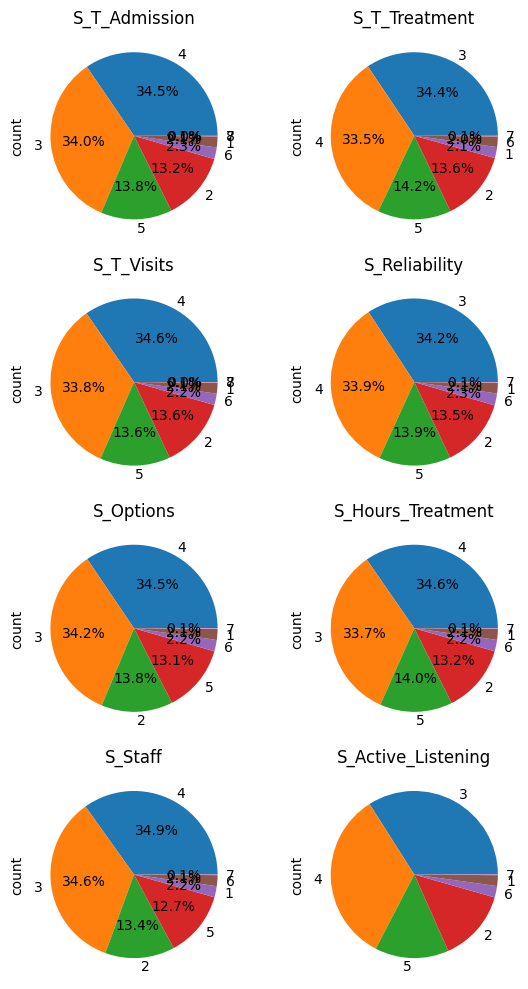

,count,mean,std,min,25%,50%,75%,max
S_T_Admission,10000.0,3.5188,1.031966,1.0,3.0,4.0,4.0,8.0
S_T_Treatment,10000.0,3.5067,1.034825,1.0,3.0,3.0,4.0,7.0
S_T_Visits,10000.0,3.5111,1.032755,1.0,3.0,4.0,4.0,8.0
S_Reliability,10000.0,3.5151,1.036282,1.0,3.0,4.0,4.0,7.0
S_Options,10000.0,3.4969,1.030192,1.0,3.0,3.0,4.0,7.0
S_Hours_Treatment,10000.0,3.5225,1.032376,1.0,3.0,4.0,4.0,7.0
S_Staff,10000.0,3.4940,1.021405,1.0,3.0,3.0,4.0,7.0
S_Active_Listening,10000.0,3.5097,1.042312,1.0,3.0,3.0,4.0,7.0


In [21]:
textprops = {"fontsize":10}  # Change the font size here

# 2 by 4 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(6, 10))

# S_T_Admission
df['S_T_Admission'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', textprops=textprops)
axes[0, 0].set_title('S_T_Admission')

# S_T_Treatment
df['S_T_Treatment'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%', textprops=textprops)
axes[0, 1].set_title('S_T_Treatment')

# S_T_Visits
df['S_T_Visits'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%', textprops=textprops)
axes[1, 0].set_title('S_T_Visits')

# S_Reliability
df['S_Reliability'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%', textprops=textprops)
axes[1, 1].set_title('S_Reliability')

# S_Options
df['S_Options'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%', textprops=textprops)
axes[2, 0].set_title('S_Options')

# S_Hours_Treatment
df['S_Hours_Treatment'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%', textprops=textprops)
axes[2, 1].set_title('S_Hours_Treatment')

# S_Staff
df['S_Staff'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%', textprops=textprops)
axes[3, 0].set_title('S_Staff')

# S_Active_Listening
df['S_Active_Listening'].value_counts().plot.pie(ax=axes[3, 1], textprops=textprops)
axes[3, 1].set_title('S_Active_Listening')
plt.tight_layout()
plt.show()

# display descriptive statistics for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].describe().transpose()

- The pie charts and summary show similar pattern across with some survey responses having almost identical proportions. This could indicate a lack of variability in the responses, which may impact the predictive power of these variables in the regression model. 

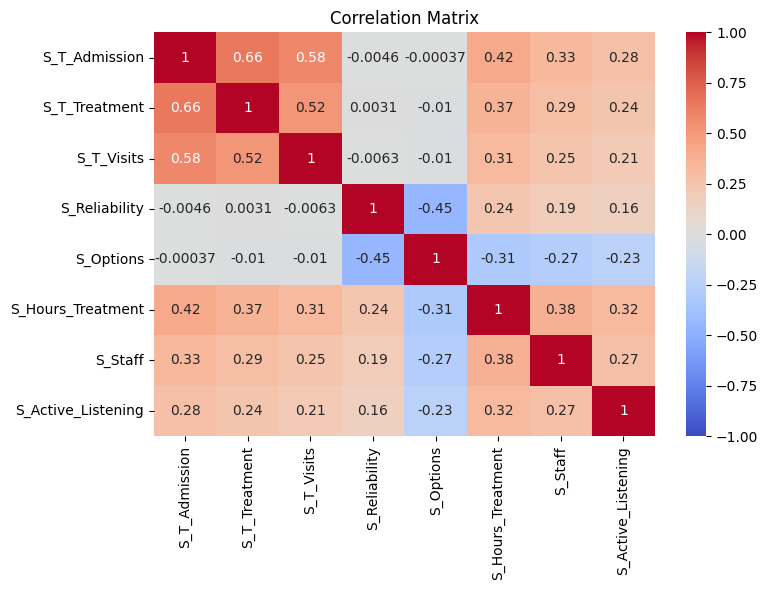

In [22]:
# Create a correlation matrix
#  the columns correlation matrix
cols = ['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability',
        'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']

corr_matrix = df[cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



- The correlation matrix shows that there may indeed be correlation amongst the different survey items. This could introduce multicolinarity into the regression model.

- These pairs of items have correlation coefficients very close to zero, suggesting that there is little to no linear relationship between them. When selecting variables for a regression model, these items might be preferred as they are less likely to introduce multicollinearity issues. We will note this during the initial model building phase. And check the VIF scores to confirm.

- S_T_Admission and S_Reliability: -0.0046
- S_T_Visits and S_Reliability: -0.0063
- S_T_Admission and S_Options: -0.0037
- S_T_Treatment and S_Options: -0.01
- S_T_Visits and S_Options: -0.01


# Bivariate Visualizations

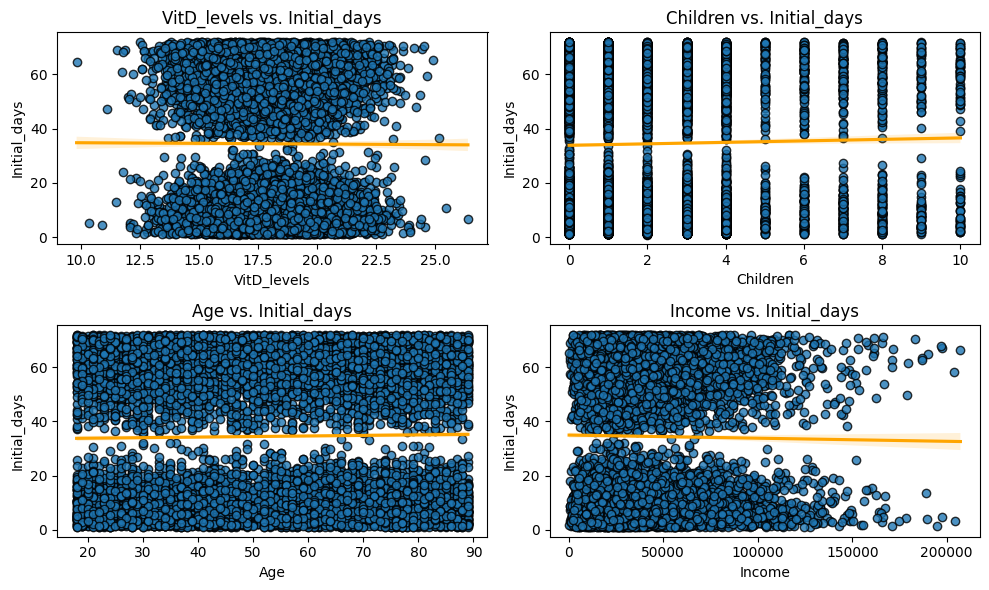

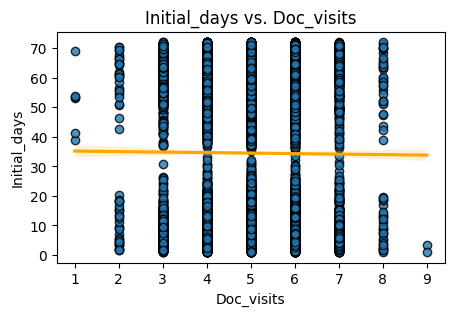

In [23]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(10, 6))

# VitD_levels: Scatter plot of VitD_levels vs. Initial_days
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='VitD_levels', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('VitD_levels vs. Initial_days')

# Children: Scatter plot of Children vs. Initial_days
plt.subplot(2, 2, 2)
sns.regplot(data=df, x='Children', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Children vs. Initial_days')

# Age: Scatter plot of Age vs. Initial_days
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='Age', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Age vs. Initial_days')

# Income: Scatter plot of Income vs. Initial_days
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='Income', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Income vs. Initial_days')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.regplot(data=df, x='Doc_visits', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Initial_days vs. Doc_visits')
plt.show()

 - `Vitamin D` levels and initial days don't seem to have a clear pattern, with no obvious relationship. When it comes to `children` ther is no distinct trend, suggesting the number of children doesn't linearly affect the length of hospital stay. `Age` shows a spread of data across the age range without a strong trend. For `income`, there's more variability at higher income levels, but there is no clear pattern suggesting a strong relationship. Overall, these plots suggest that individually, these variables do not have a simple linear relationship with the number of initial days spent in the hospital. However, together they might. Income might benifit from a transformation to better understand the relationship. `Doc_visits` suggest that there is no strong, straightforward relationship between the number of doctor visits and the average initial days, as increased doctor visits do not correlate with either a significant increase or decrease in the initial days.



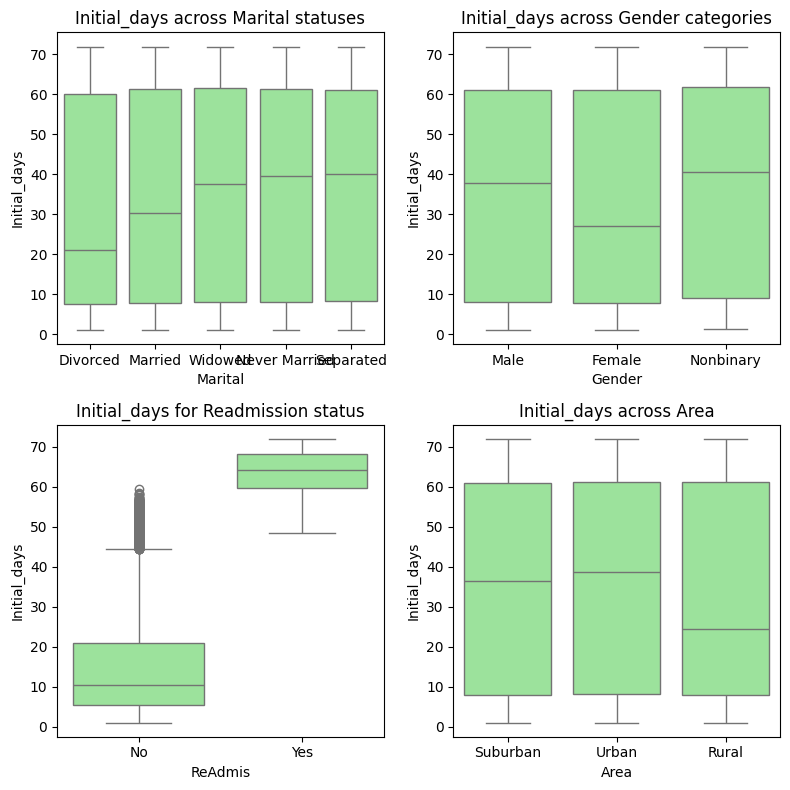

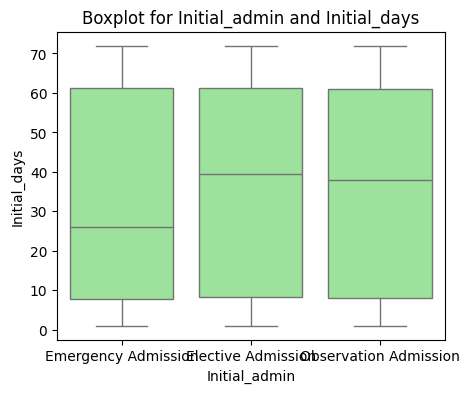

In [24]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(8, 8))
# Marital: box plot showing distribution of Initial_days across Marital statuses
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Marital', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Marital statuses')

# Gender: box plot showing distribution of Initial_days across Gender categories
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Gender', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Gender categories')

# ReAdmis: box plot showing distribution of Initial_days for Readmission status
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='ReAdmis', y='Initial_days', color='lightgreen')
plt.title('Initial_days for Readmission status')

# Area: box plot showing distribution of Initial_days across Area categories
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Area', y='Initial_days', color='lightgreen')
plt.title('Initial_days across Area')

plt.tight_layout()
plt.show()

# boxplot with Initial_admin and Initial_days
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Initial_admin', y='Initial_days', color='lightgreen')
plt.title('Boxplot for Initial_admin and Initial_days')
plt.show()


The `Marital` statuses plot shows that seperated and single patients tend to have the highest number of days in the hospital, and that divorced and married tended to spend fewer days. The `Gender` categories show slightly higher median Initial_days for males and non binary patients and a notably lower median for females compared to males. The `Readmission` plot is very interesting. It shows a significantly higher median and and grouping of `Initial_days` for readmitted patients compared to non-readmitted patients, with several outliers representing long stays among readmitted patients. Lastly, the Area plot demonstrates a slightly lower median for urban areas, suggesting hospital time is less for urban patients compared to rural and suburban patients. Interstingly, `Initial_admin` shows a higher median for elective admissions compared to emergency admissions.

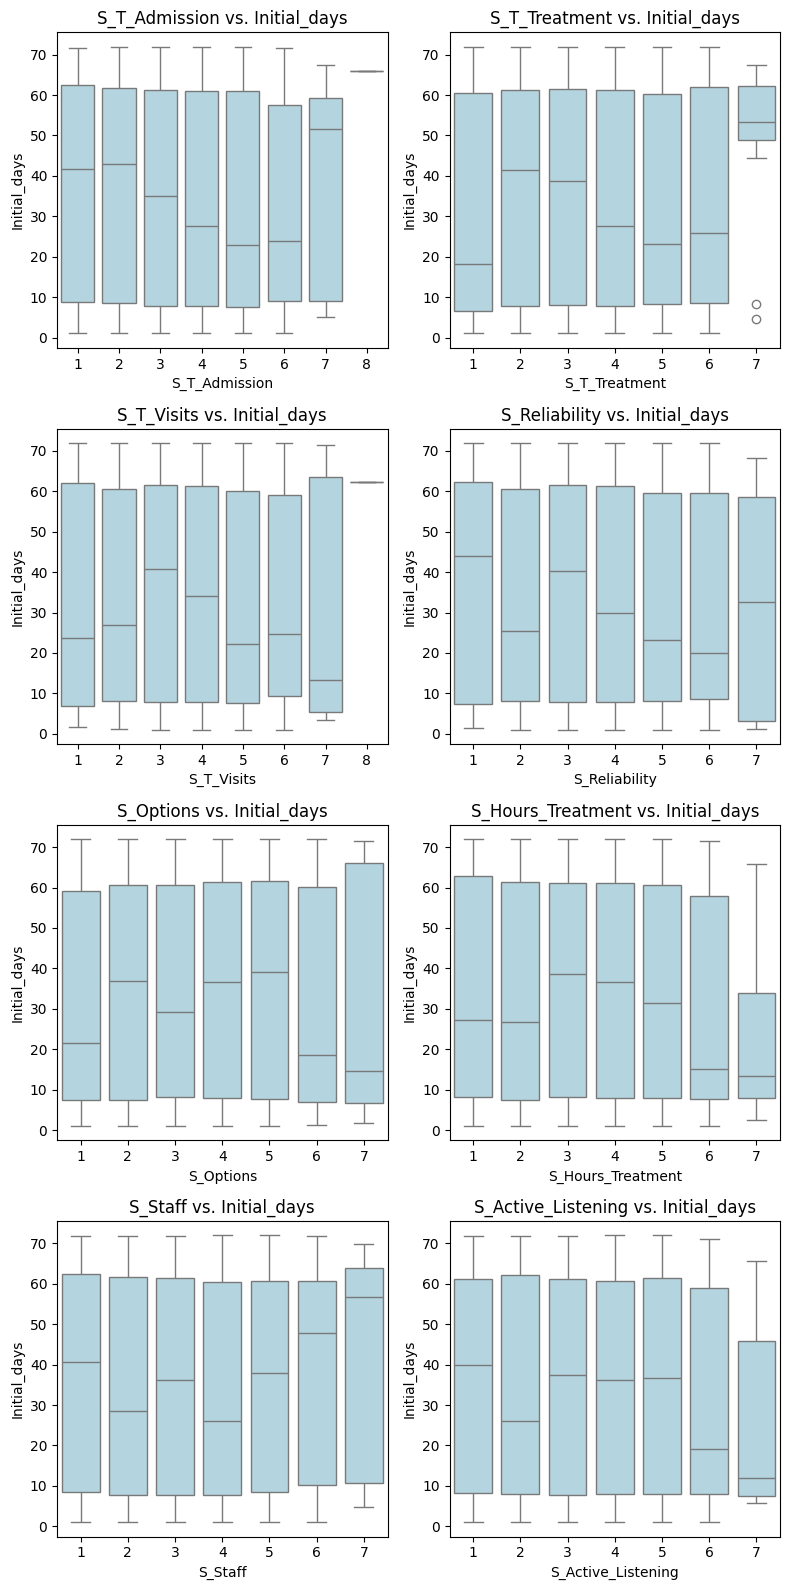

In [25]:
# 4 by 2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(8, 16))

# S_T_Admission
sns.boxplot(data=df, x='S_T_Admission', y='Initial_days', ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('S_T_Admission vs. Initial_days')

# S_T_Treatment
sns.boxplot(data=df, x='S_T_Treatment', y='Initial_days', ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('S_T_Treatment vs. Initial_days')

# S_T_Visits
sns.boxplot(data=df, x='S_T_Visits', y='Initial_days', ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title('S_T_Visits vs. Initial_days')

# S_Reliability
sns.boxplot(data=df, x='S_Reliability', y='Initial_days', ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('S_Reliability vs. Initial_days')

# S_Options
sns.boxplot(data=df, x='S_Options', y='Initial_days', ax=axes[2, 0], color='lightblue')
axes[2, 0].set_title('S_Options vs. Initial_days')

# S_Hours_Treatment
sns.boxplot(data=df, x='S_Hours_Treatment', y='Initial_days', ax=axes[2, 1], color='lightblue')
axes[2, 1].set_title('S_Hours_Treatment vs. Initial_days')

# S_Staff
sns.boxplot(data=df, x='S_Staff', y='Initial_days', ax=axes[3, 0], color='lightblue')
axes[3, 0].set_title('S_Staff vs. Initial_days')

# S_Active_Listening
sns.boxplot(data=df, x='S_Active_Listening', y='Initial_days', ax=axes[3, 1], color='lightblue')
axes[3, 1].set_title('S_Active_Listening vs. Initial_days')

plt.tight_layout()
plt.show()


- Seeing these survey results in a bivariate plot with Initial_days is interesting in the variation in the median Initial_days across the different survey responses. Admittedly, I am a little unsure about how to interpret this. The initial thinking is that there is some interesting insights to gleam from this. Perhaps this suggests that the survey responses may have some predictive power in determining the length of a patient's hospital stay.

----------------------------------------------------------------------

In [26]:
# chack for Nan values
df.isnull().sum()

Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
vitD_supp             0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
S_T_Admission         0
S_T_Treatment         0
S_T_Visits            0
S_Reliability         0
S_Options             0
S_Hours_Treatment     0
S_Staff               0
S_Active_Listening    0
Initial_days          0
dtype: int64

### G & H: References

- Western Governors University. (2023, December 21). D207 - Medical_clean Dataset. Retrieved from https://lrps.wgu.edu/provision/227079957

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#

- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Sewell, Dr. (2023). WGU D207 Exploratory Data Analysis [Webinars]. WGU Webex. Accessed December, 2023. https://wgu.webex.com/webappng/sites/wgu/meeting/info/c4aca2eac546482880f1557c938abf40?siteurl=wgu&MTID=me73470c2eac9e863c6f47a3d5b6d2f26 

- Seaborn Developers. (2023). seaborn.scatterplot — seaborn 0.11.2 documentation. Retrieved December 22, 2023, from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

OLD ABOVE _ DELETE?KEEP? as needed.

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- Pennsylvania State University. (n.d.). *5.3 - The Multiple Linear Regression Model*. STAT 501. Retrieved March 10, 2024, from online.stat.psu.edu/stat501/lesson/5/5.3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html



In [27]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


4115

# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


